In [80]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [82]:
df = pd.read_csv("german_credit.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [83]:
df.describe().T
# print(df.shape)

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [84]:
df.shape

(1000, 21)

In [85]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable
df.head(5)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [86]:
from sklearn.model_selection import train_test_split

X = df.drop("default", axis=1)
y = df["default"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state = 7)

In [87]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [88]:
# Print Shape of model data

df_new = pd.get_dummies(df,drop_first=True)
# df_new.head()
df_new.shape
# df_new.describe().T

(1000, 49)

### Check for highly correlated variables but don't required any treatment for this use case

In [89]:
# sns.pairplot(df_new, diag_kind="kde")
corr = df_new.corr()
corr

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.258333,-0.044009,...,0.125750,-0.113285,0.050523,-0.134589,0.092785,-0.013559,0.005951,-0.021822,-0.036466,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.022244,-0.076455,...,0.212838,-0.067602,0.065688,-0.075169,-0.064417,0.055010,-0.044043,-0.181203,0.164718,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,-0.020912,-0.100510,...,0.248922,-0.048292,0.024262,-0.117497,-0.024611,-0.092636,-0.027969,-0.161757,0.276995,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,0.046917,-0.041591,...,0.044990,-0.016139,0.056071,0.049922,-0.091373,0.042623,-0.087834,-0.057237,0.014413,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.088350,-0.064303,...,0.188028,0.016704,-0.054460,-0.297547,0.167285,-0.000657,-0.034545,0.009065,0.095359,0.054097
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.011162,0.037504,...,0.206368,-0.035362,-0.011080,0.006553,-0.212620,-0.148283,0.059954,0.043712,0.145259,0.006151
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.029195,-0.040213,...,-0.012850,-0.050290,0.023496,0.041386,-0.058070,-0.001471,0.059582,-0.010392,0.065553,0.009717
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,0.059041,-0.008700,...,0.077548,-0.072220,0.009335,-0.027579,-0.063033,-0.106737,-0.007723,0.145066,-0.014753,-0.077071
account_check_status_< 0 DM,0.258333,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,1.000000,-0.159297,...,0.048476,-0.017494,0.011886,-0.125705,0.093310,-0.002879,-0.000428,0.023542,-0.067149,-0.057751
account_check_status_>= 200 DM / salary assignments for at least 1 year,-0.044009,-0.076455,-0.100510,-0.041591,-0.064303,0.037504,-0.040213,-0.008700,-0.159297,1.000000,...,-0.008005,-0.002983,0.020206,0.018934,-0.035183,-0.022932,0.073347,0.014405,-0.028955,-0.036392


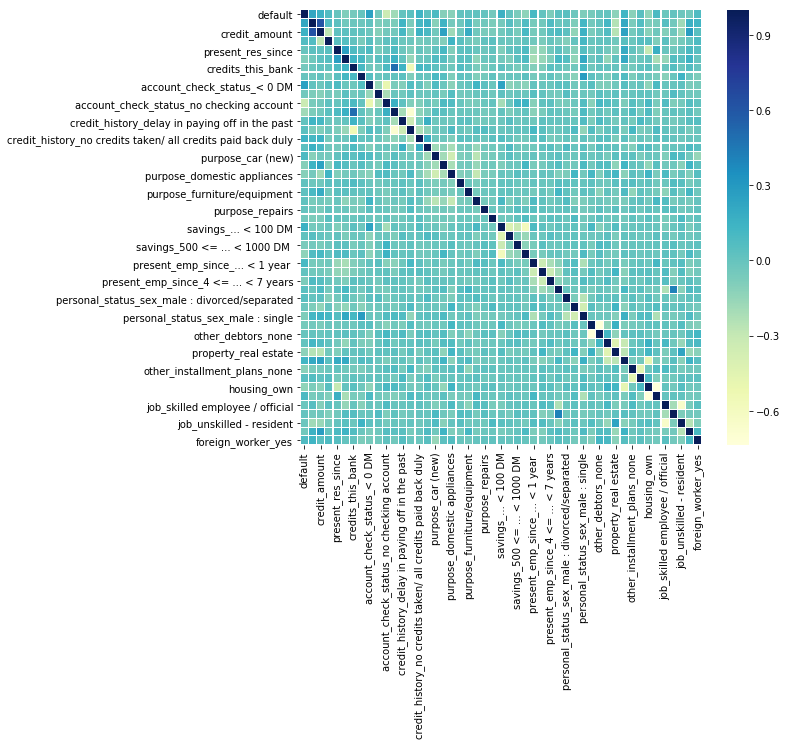

In [90]:
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corr, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

### Drop the original variables which are converted to dummy

In [91]:
# df_new.to_excel("dummy.xlsx")

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [92]:
X = df_new.drop("default", axis=1)
y = df_new["default"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 7)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
from scipy.stats import zscore
from sklearn.metrics import roc_curve, auc

In [94]:
rf_model = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion='entropy',random_state=9999 )

y_test.shape

(300,)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [95]:
rf_model.fit(X_train, y_train)
yrf_predict = rf_model.predict(X_test)
rf_accuracy = metrics.accuracy_score(y_test,yrf_predict)
print("Random Forest Accuracy : " + str(rf_accuracy))

print("Confusion Matrix :")
print(metrics.confusion_matrix(y_test,yrf_predict))




Random Forest Accuracy : 0.79
Confusion Matrix :
[[202  15]
 [ 48  35]]


### Q6 Show the list of the features importance( 1 Marks)

In [100]:
from matplotlib import pyplot
# print(rf_model.feature_importances_)
# # plot
# pyplot.bar(range(len(rf_model.feature_importances_)), rf_model.feature_importances_)
# pyplot.show()

feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

                                                    importance
credit_amount                                         0.116171
age                                                   0.091958
duration_in_month                                     0.086272
account_check_status_no checking account              0.056920
installment_as_income_perc                            0.041192
present_res_since                                     0.039835
account_check_status_< 0 DM                           0.034739
other_installment_plans_none                          0.021859
personal_status_sex_male : single                     0.020952
savings_... < 100 DM                                  0.020929
credits_this_bank                                     0.020832
credit_history_critical account/ other credits ...    0.020335
telephone_yes, registered under the customers n...    0.019920
job_skilled employee / official                       0.019635
purpose_car (new)                                     0

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [101]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [102]:
# Use below values
num_folds = 10
seed = 77
# kfold = KFold(n_splits=10,random_state=77)

In [103]:
#Validate the Random Forest model build above using k fold

In [104]:
scoring = 'accuracy'
kfold = model_selection.KFold(n_splits=10,random_state=77)
scores = model_selection.cross_val_score(rf_model, X, y, cv=kfold, scoring=scoring)
print(scores)

[0.87 0.67 0.79 0.81 0.81 0.68 0.75 0.78 0.75 0.76]


In [105]:
#Calculate Mean score

In [106]:
print("Accuracy: %0.2f " % (scores.mean()))

Accuracy: 0.77 


In [107]:
# Calculate score standard deviation using std()
print("Standard Deviation: %0.2f " % (scores.std()))

Standard Deviation: 0.06 


# Q8 Print the confusion matrix( 1 Marks)

In [108]:
metrics.confusion_matrix(y_test,yrf_predict)

array([[202,  15],
       [ 48,  35]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [109]:
print(classification_report(y_test, yrf_predict))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       217
           1       0.70      0.42      0.53        83

   micro avg       0.79      0.79      0.79       300
   macro avg       0.75      0.68      0.70       300
weighted avg       0.78      0.79      0.77       300



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [110]:
#Hint: Use roc_curve
from sklearn.metrics import roc_curve, auc

ROC :0.676281161512409


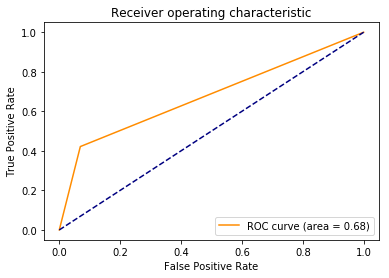

In [111]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, yrf_predict)
roc_auc = auc(fpr, tpr)
roc_auc
print("ROC :" + str(roc_auc))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
